In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Simple Linear Regression on Salary Data

In [2]:
sd = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\assign 4\Salary_Data.csv")

In [4]:
sd.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sd.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [35]:
sd.ndim

2

In [6]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
sd.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
sd.shape

(30, 2)

In [11]:
sd[sd.duplicated()].shape

(0, 2)

In [15]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


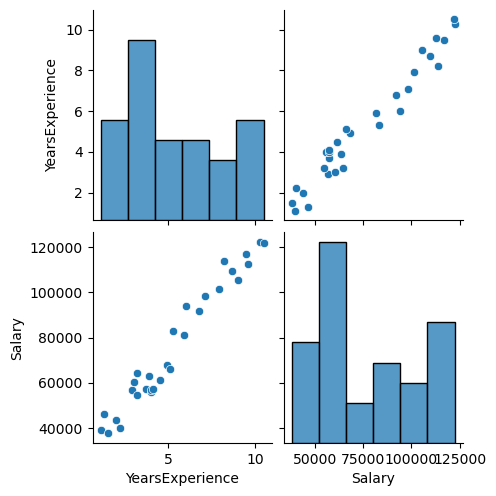

In [17]:
sn.pairplot(sd)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

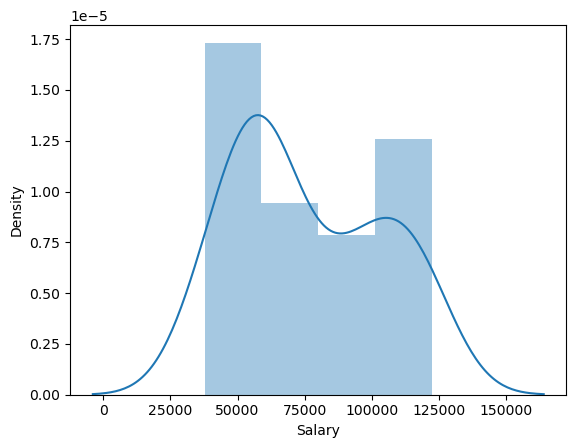

In [25]:
sn.distplot(sd['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

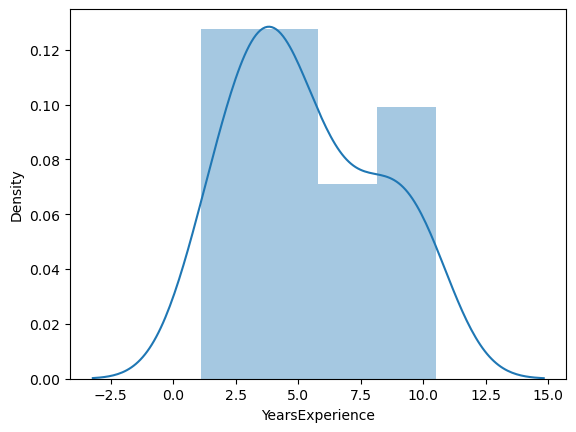

In [26]:
sn.distplot(sd['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

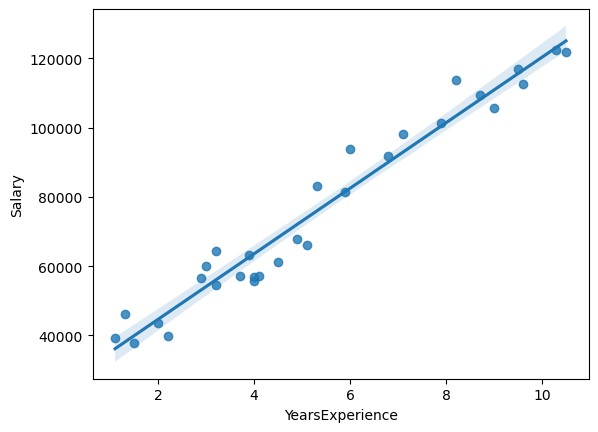

In [33]:
sn.regplot(x=sd['YearsExperience'],y=sd['Salary'])

<AxesSubplot:>

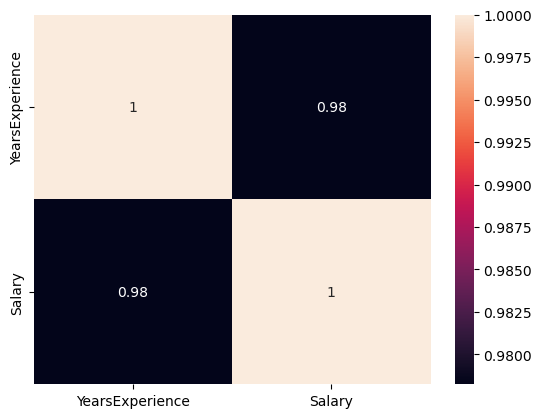

In [34]:
sn.heatmap(sd.corr(),annot=True)

In [36]:
import statsmodels.formula.api as sm

In [38]:
sd_model= sm.ols('Salary~YearsExperience',data = sd).fit()

In [40]:
sd_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [41]:
#print values for p and t
print(f"t values is \n{sd_model.tvalues}\np values is \n{sd_model.pvalues}")

t values is 
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
p values is 
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [42]:
sd_model.rsquared

0.9569566641435086

In [44]:
sd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        11:44:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
sd_model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

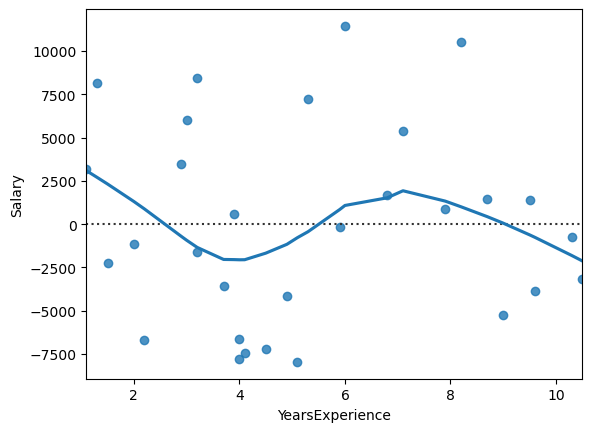

In [50]:
sn.residplot(x = sd['YearsExperience'], y =sd['Salary'], data = sd,lowess= True)

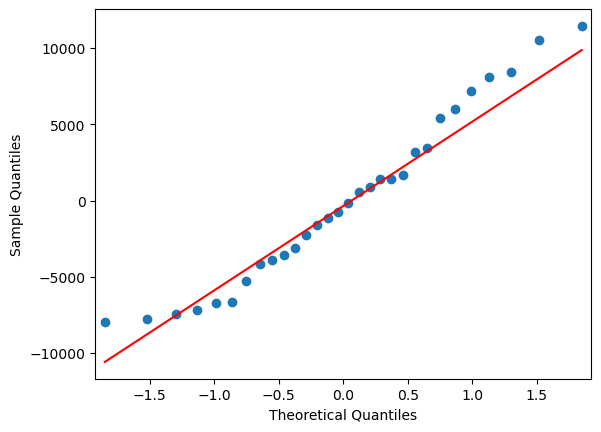

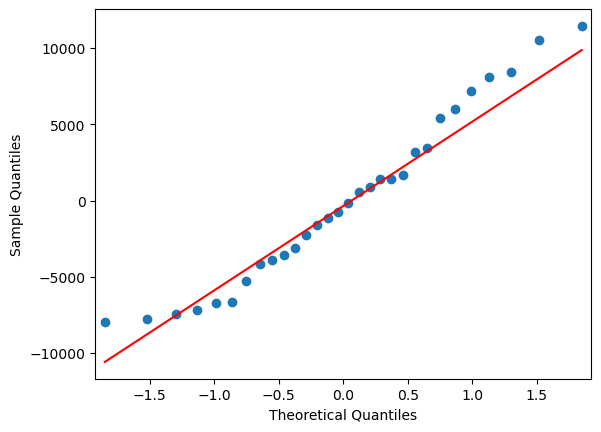

In [60]:
import statsmodels.api as ssm
# Q-Q plot
ssm.qqplot(sd_model.resid, line = 'q')

In [61]:
# above the plot the first model follows normal distribution

In [62]:
def get_standardize_values(vals):
    return(vals-vals.mean())/vals.std()
# get standardize value

Text(0, 0.5, 'Standardize Residual values')

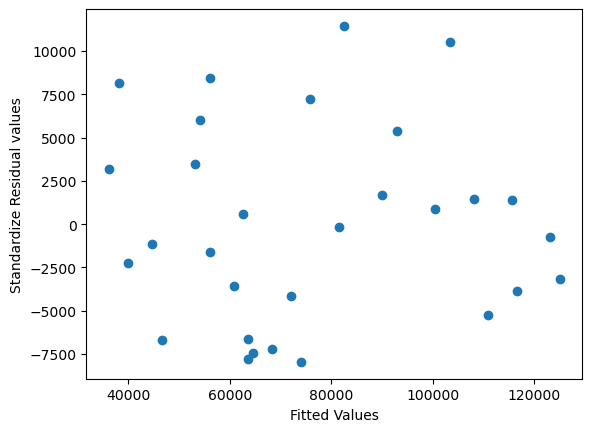

In [64]:
plt.scatter(sd_model.fittedvalues,sd_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Standardize Residual values')

In [65]:
#  The Fitted values do not share any Pattern & there is no relation between the Residual and the Fitted Value. It is Randomly distributed.

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
sd_model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = sd).fit()

In [70]:
sd_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        15:02:36   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
sd_model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = sd).fit()
sd_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           6.37e-18
Time:                        15:03:45   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
sd_model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = sd).fit()
sd_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        15:04:25   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
sd_model1_pred_y =np.square(sd_model1.predict(sd['YearsExperience']))
sd_model2_pred_y =pow(sd_model2.predict(sd['YearsExperience']),3)
sd_model3_pred_y =np.exp(sd_model3.predict(sd['YearsExperience']))

In [77]:
sd_model1_rmse =np.sqrt(mean_squared_error(sd['Salary'],sd_model1_pred_y))
sd_model2_rmse =np.sqrt(mean_squared_error(sd['Salary'], sd_model2_pred_y))
sd_model3_rmse =np.sqrt(mean_squared_error(sd['Salary'], sd_model3_pred_y))
print('sd_model=', np.sqrt(sd_model.mse_resid),'\n' 'sd_model1=', sd_model1_rmse,'\n' 'sd_model2=', sd_model2_rmse,'\n' 'sd_model3=', sd_model3_rmse)

sd_model= 5788.315051119395 
sd_model1= 5960.647096174311 
sd_model2= 6232.8154558358565 
sd_model3= 7219.716974372802


In [78]:
rmse = {'sd_model': np.sqrt(sd_model.mse_resid), 'sd_model1': sd_model1_rmse, 'sd_model2': sd_model3_rmse, 'sd_model3' : sd_model3_rmse}
min(rmse, key=rmse.get)

'sd_model'

In [83]:
# first model results without any transformation
sd_predicted2 = pd.DataFrame()
sd_predicted2['YearsExperience'] = sd.YearsExperience
sd_predicted2['Salary'] = sd.Salary
sd_predicted2['Predicted_Salary_Hike'] = pd.DataFrame(sd_model.predict(sd_predicted2.YearsExperience))
sd_predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
